In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [ ]:
from matplotlib import rcParams

rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [ ]:
df = pd.read_csv('/content/online_shoppers_intention.csv')

In [ ]:
df.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
11643,6,461.00,0,0.0,4,111.000000,0.0,0.011111,0.0,0.0,Dec,3,3,3,8,New_Visitor,False,False
6871,8,196.55,0,0.0,27,422.533333,0.0,0.009195,0.0,0.0,Sep,2,4,1,2,Returning_Visitor,False,False
9557,0,0.00,0,0.0,5,0.000000,0.2,0.200000,0.0,0.0,Nov,2,2,2,1,Returning_Visitor,False,False
4614,0,0.00,0,0.0,6,180.666667,0.0,0.033333,0.0,0.0,May,1,1,2,2,Returning_Visitor,False,False
3354,0,0.00,0,0.0,8,56.333333,0.0,0.012500,0.0,1.0,May,2,2,1,4,Returning_Visitor,True,False


Terdapat beberapa kolom yang perlu dilakukan label encoding dan one hot encoding.

*   Label Encoding = Weekend, dan Revenue
*   One Hot Encoding = Month, dan VisitorType



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
nums = ['Administrative',
        'Administrative_Duration',
        'Informational',
        'Informational_Duration',
        'ProductRelated',
        'ProductRelated_Duration',
        'BounceRates',
        'ExitRates',
        'PageValues',
        'SpecialDay']
cats = ['Month',
        'OperatingSystems',
        'Browser',
        'Region',
        'TrafficType',
        'VisitorType',
        'Weekend',
        'Revenue']

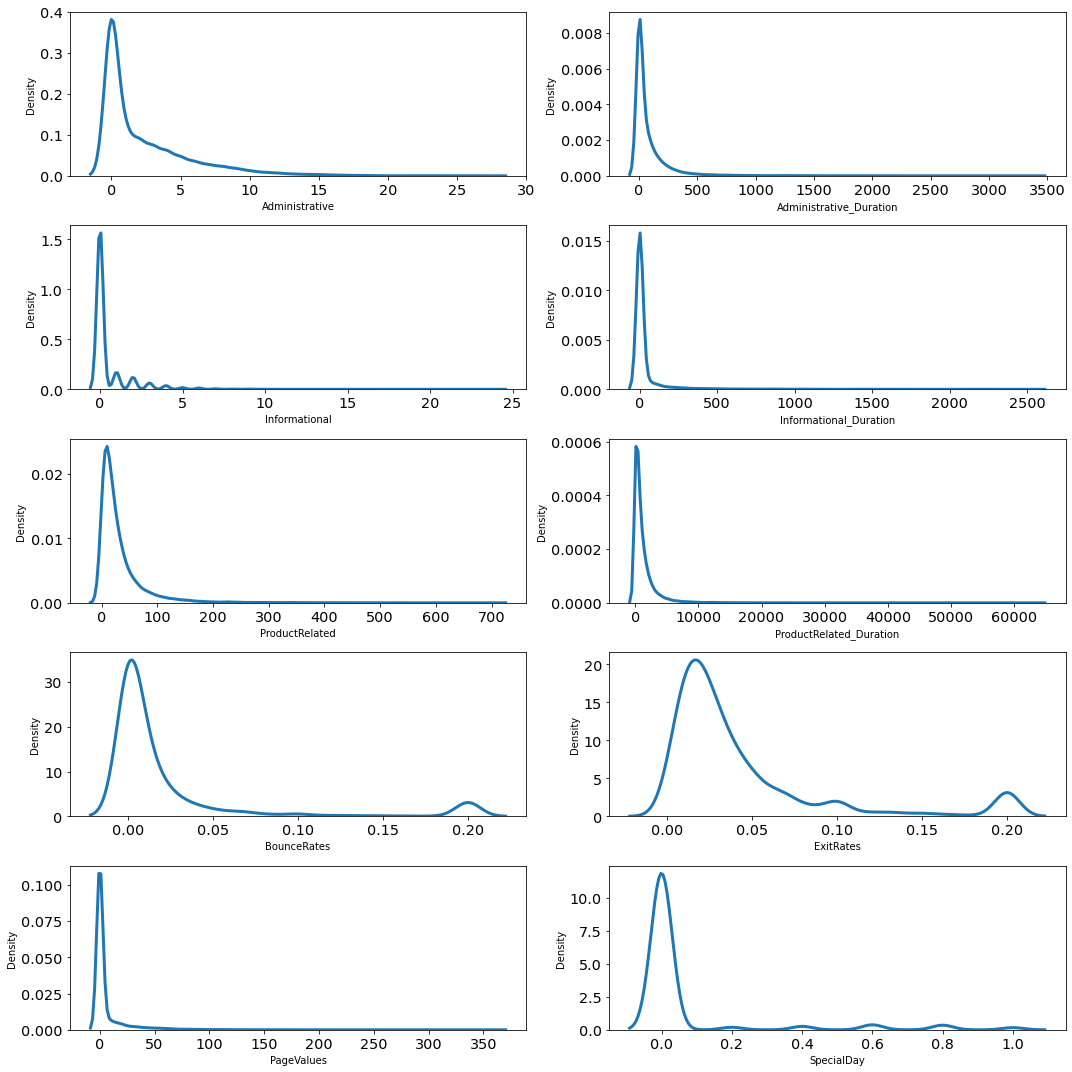

In [ ]:
plt.figure(figsize=(15, 15))
for i in range(0, len(nums)):
    plt.subplot(5, len(nums)/4, i+1)
    sns.kdeplot(x=df[nums[i]])
    plt.xlabel(nums[i])
    plt.tight_layout()

Karena seluruh penyebaran data nya masih termasuk ke dalam Right-Skewed maka nantinya akan dilakukan log transform agar dapat mendekati distribusi normal

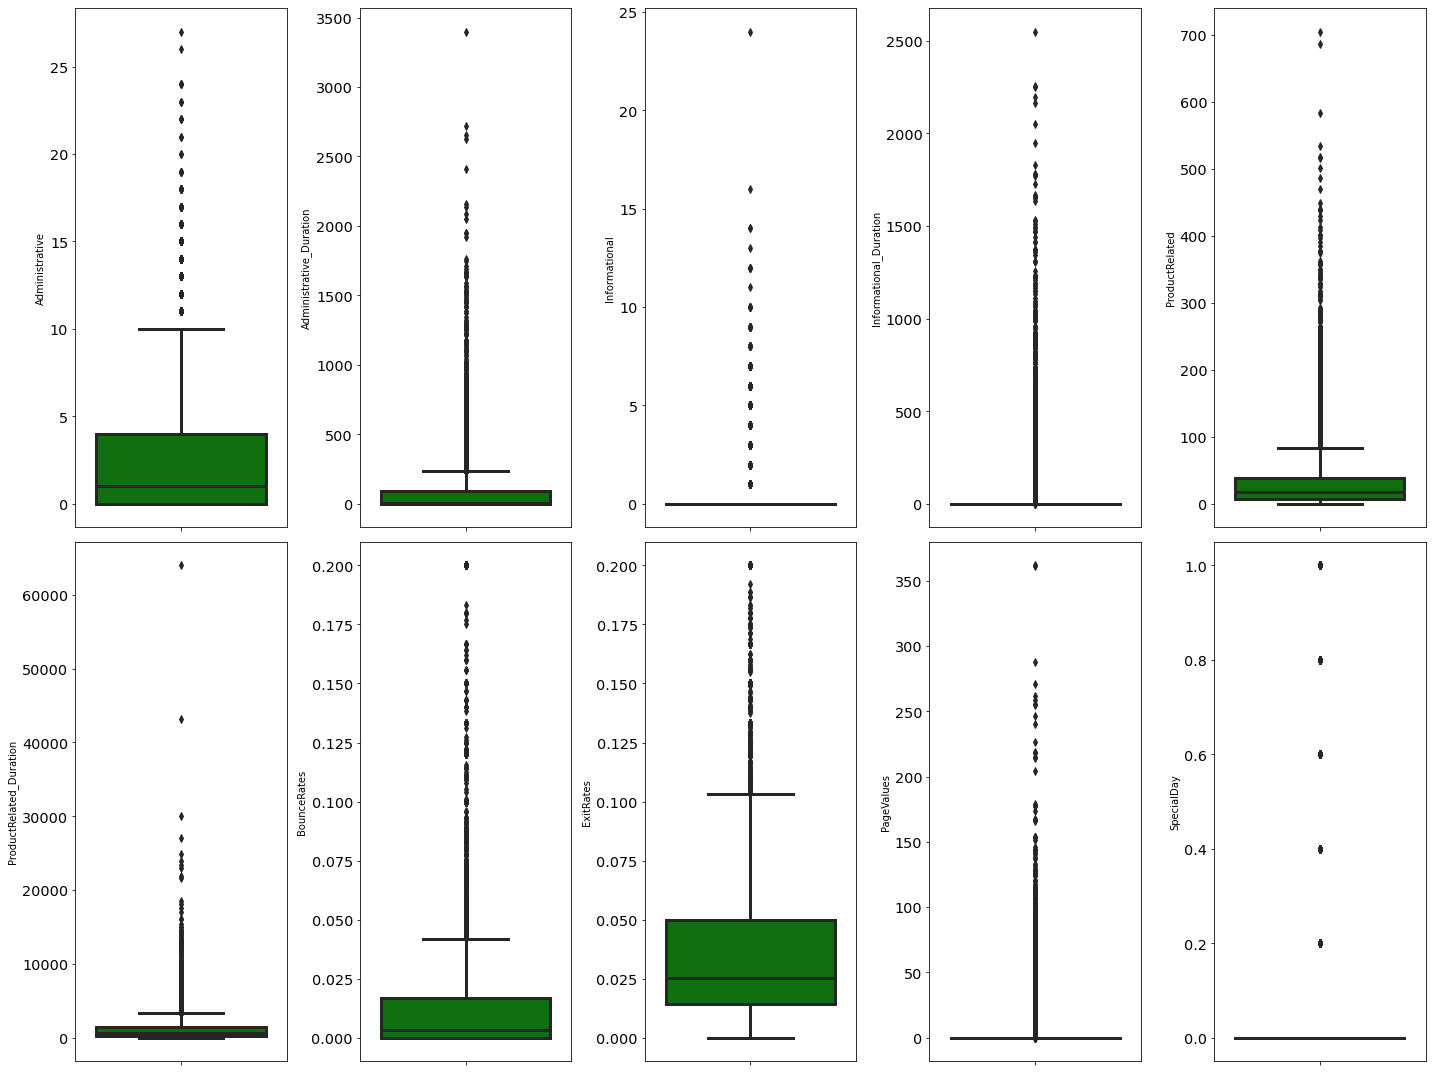

In [ ]:
features = nums
plt.figure(figsize=(20, 15))
for i in range(0, len(features)):
    plt.subplot(2, len(features)/2, i+1)
    sns.boxplot(y=df[features[i]], color='green', orient='v')
    plt.tight_layout()

Terdapat lumayan banyak outlier pada tiap data diatas tersebut, maka nantinya akan menggunakan handling outlier dengan zscore, agar data yang terhandle hanya 0.3% saja sehingga data masih banyak yang dapat digunakan dalam modelling

In [ ]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Month:
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

Value count kolom OperatingSystems:
2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

Value count kolom Browser:
2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

Value count kolom Region:
1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

Value count kolom TrafficType:
2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

Value count kolom VisitorType:
Return

Perlu dilakukan handle imbalance, nantinya akan digunakan metode SMOTE agar data yang ada tidak terbuang banyak karena imbalance data yang sangat jauh

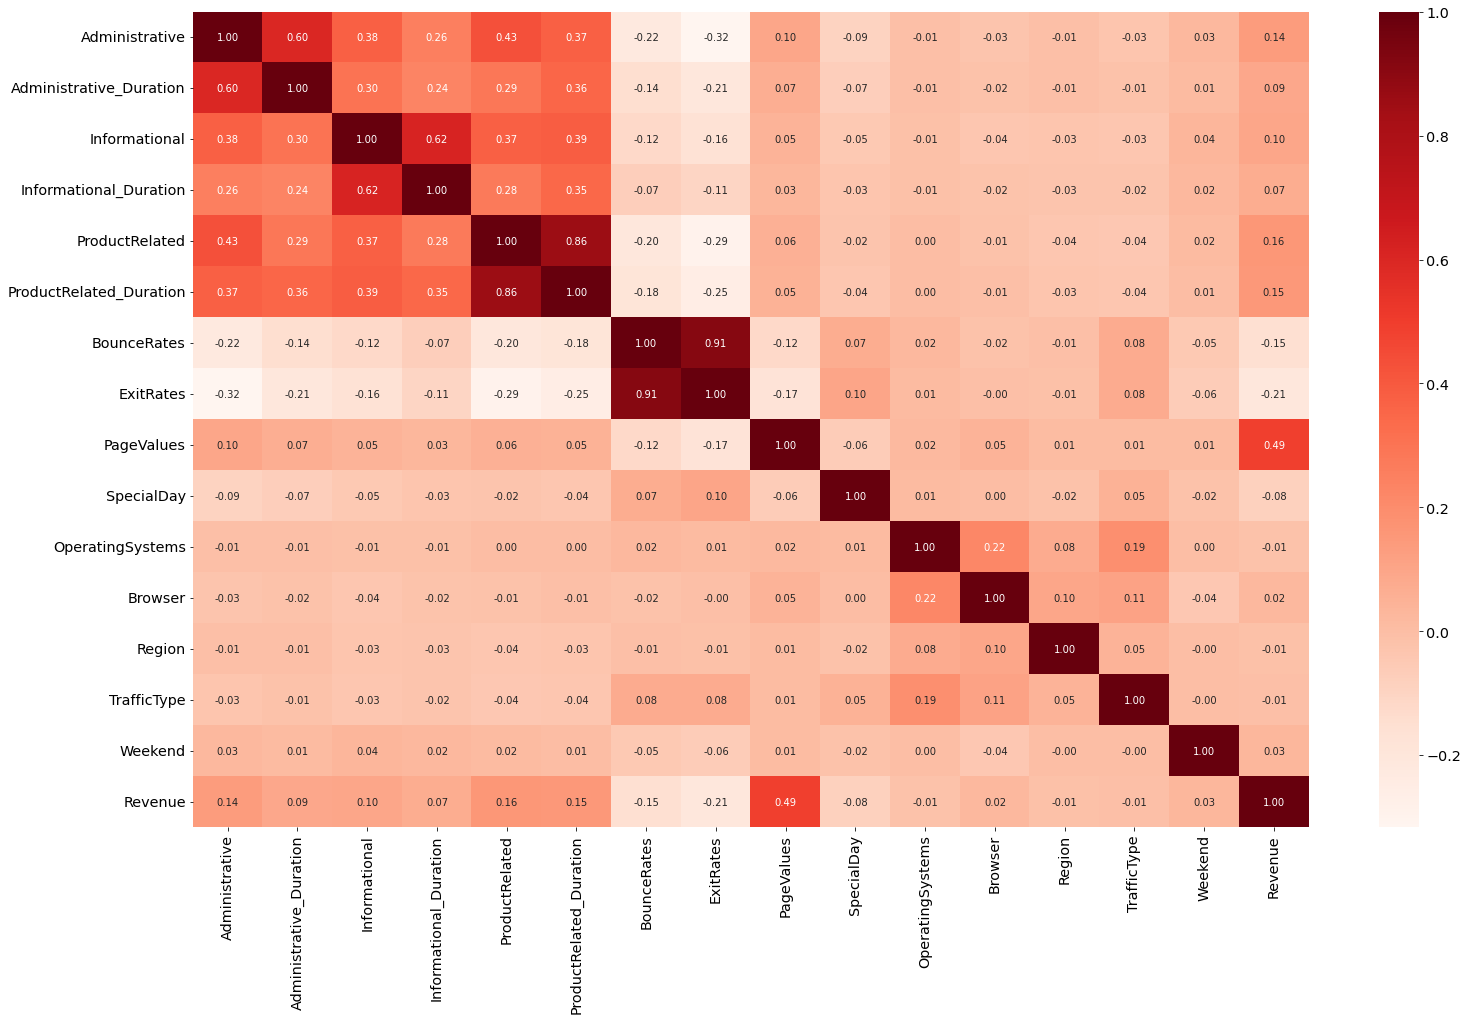

In [ ]:
plt.figure(figsize=(25, 15))
sns.heatmap(df.corr(), cmap='Reds', annot=True, fmt='.2f')



*   Belum terdapat fitur atau kolom baru yang akan dibuat
*   Target variable kami 'Revenue' berkorelasi positif cukup kuat dengan variabel 'PageValues' (strong potential feature)
* Ia juga memiliki korelasi positif lemah dengan 'Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', dan 'ProductRelated-Duration'(decent potential feature)
* Ia juga memiliki korelasi negatif lemah dengan 'BounceRates', 'ExitRates', dan 'SpecialDay' (decent potential feature)
* Sedangkan korelasi 'Revenue' dengan 'OperatingSystems', 'Browser', 'Region', 'TrafficType', dan 'Weekend' sangat lemah ~0, ini menandakan bisa jadi mereka bukan fitur yang potensial (yang kemungkinan tidak akan dipakai fitur ini)
* 'ExitRates' memiliki korelasi positif sangat kuat dengan 'BounceRates'. Ada kemungkinan kedua *feature* ini redundan (dipilih salah satunya saja untuk training data)
* 'ProductRelated' memiliki korelasi positif sangat kuat dengan 'ProductRelated_Duration'. Ada kemungkinan kedua *feature* ini redundan (dipilih salah satunya saja untuk training data)


Terdapat 2 versi dalam menggunakan feature dalam modelling nantinya :


1.   Modelling dengan penggunaan semua feature
2.   Modelling dengan melakukan drop feature, yaitu drop salah satu fitur yang yang terdapat redundan di antara kedua nya dan drop fitur yang memiliki korelasi sangat lemah yaitu kurang dari 0.05




### Missing Data

In [ ]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Tidak ada indikasi ditemukannya missing data (null values), sehingga tidak perlu dilakukan handling 
missing data pada preprocessing.

### Duplicated Data

In [ ]:
df.duplicated().sum()

125

Diketahui data online shoppers intention memiliki 125 duplicated data, sehingga perlu di drop.

In [ ]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

Setelah dilakukan proses handling duplicated data, dapat dilihat seluruh data yang duplikat sudah di-drop (jumlah duplicated data nol).

### Outliers Handling

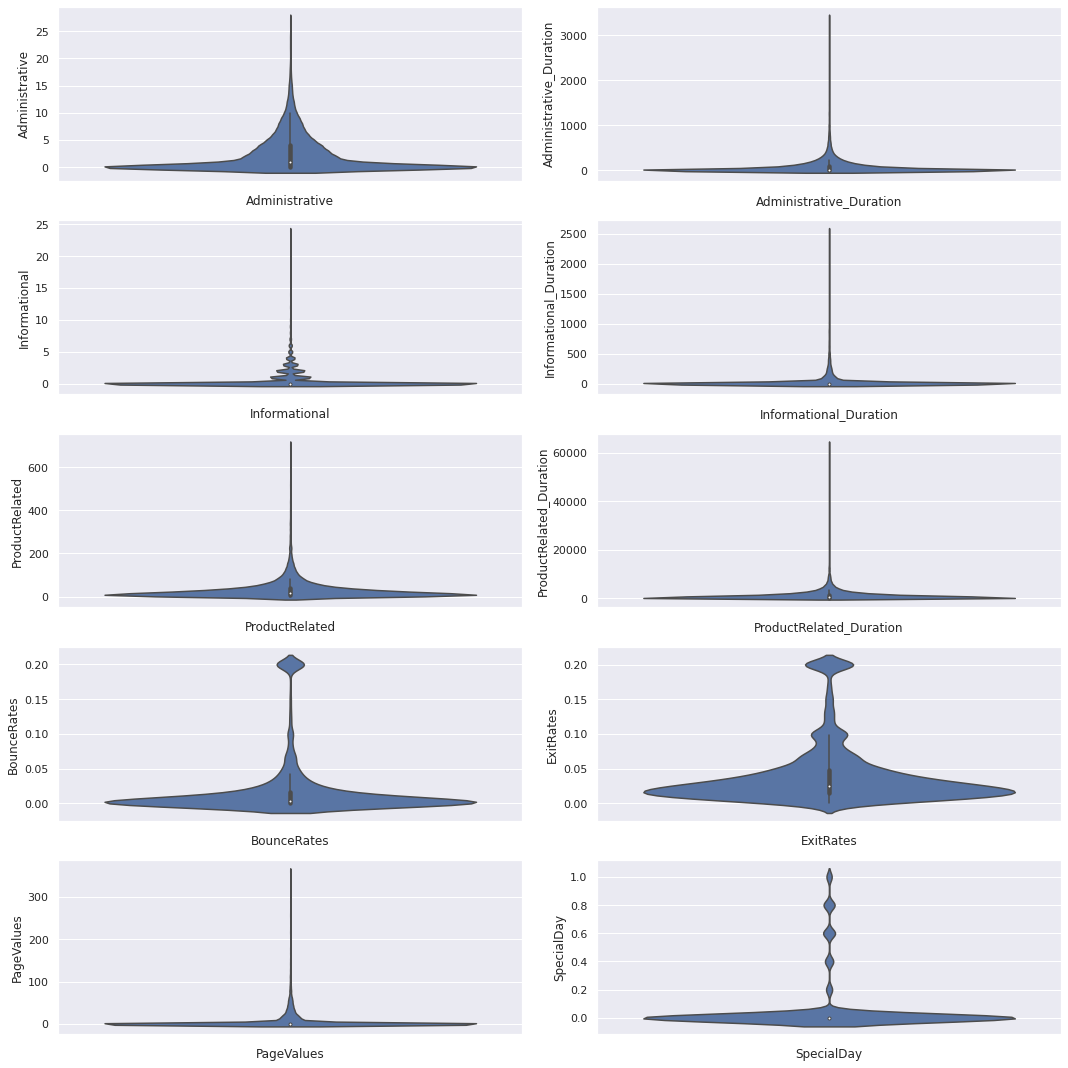

In [ ]:
plt.figure(figsize=(15, 15))
sns.set(style='darkgrid')

for i in range(0, len(nums)):
    plt.subplot(5, round(len(nums)/5), i+1)
    sns.violinplot(y=df[nums[i]], orient='v')
    plt.xlabel(nums[i])
    plt.tight_layout()

In [ ]:
# Run onces!
from scipy import stats

print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in nums:
    zscore = abs(stats.zscore(df[col])) 
    filtered_entries = (zscore < 3) & filtered_entries
    
df = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 12205
Jumlah baris setelah memfilter outlier: 10020


In [ ]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,10020.000000,10020.000000,10020.000000,10020.000000,10020.000000,10020.000000,10020.000000,10020.000000,10020.000000,10020.000000,10020.000000,10020.000000,10020.000000,10020.000000
mean,2.046806,60.738393,0.340918,14.979512,26.992315,993.677526,0.011306,0.034070,4.063109,0.030459,2.113772,2.350798,3.151697,4.014471
std,2.713837,99.241827,0.826948,51.432683,27.716095,1131.673646,0.020969,0.029813,10.820102,0.119913,0.886305,1.687538,2.402327,3.933128
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,214.333333,0.000000,0.013971,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,590.716667,0.000341,0.025000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,3.000000,84.500000,0.000000,0.000000,35.000000,1344.531250,0.013774,0.043952,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,12.000000,611.033333,4.000000,451.500000,165.000000,6951.972222,0.155556,0.177778,61.808436,0.600000,8.000000,13.000000,9.000000,20.000000


### Feature Transformation

Pada bagian feature transformation, dilakukan standarisasi yang harapannya dapat mengubah bentuk sebaran data numerik menjadi mendekati distribusi normal.
Awalnya telah dilakukan log transformation, namun mengingat banyak data dengan value 0 maka menghasilkan -infinite. Untuk mengatasinya, kami mencoba menambahkan value angka kecil terhadap nilai nol (menambahkan konstanta pada log x), namun setelah angka (positif) tersebut ditambahkan lalu di log transform, ternyata hasil distribusinya menyebabkan terbentuk dua puncak. Sedangkan ketika menggunakan konstanta angka kecil (negatif), mayoritas sebaran data mendekati normal namun values pada dataset berubah menjadi NaN. Maka dari itu, untuk sementara kami hanya menggunakan standarisai. Kedepannya akan disesuaikan dengan kebutuhan model untuk melihat pengaruhnya terhadap performance model. 

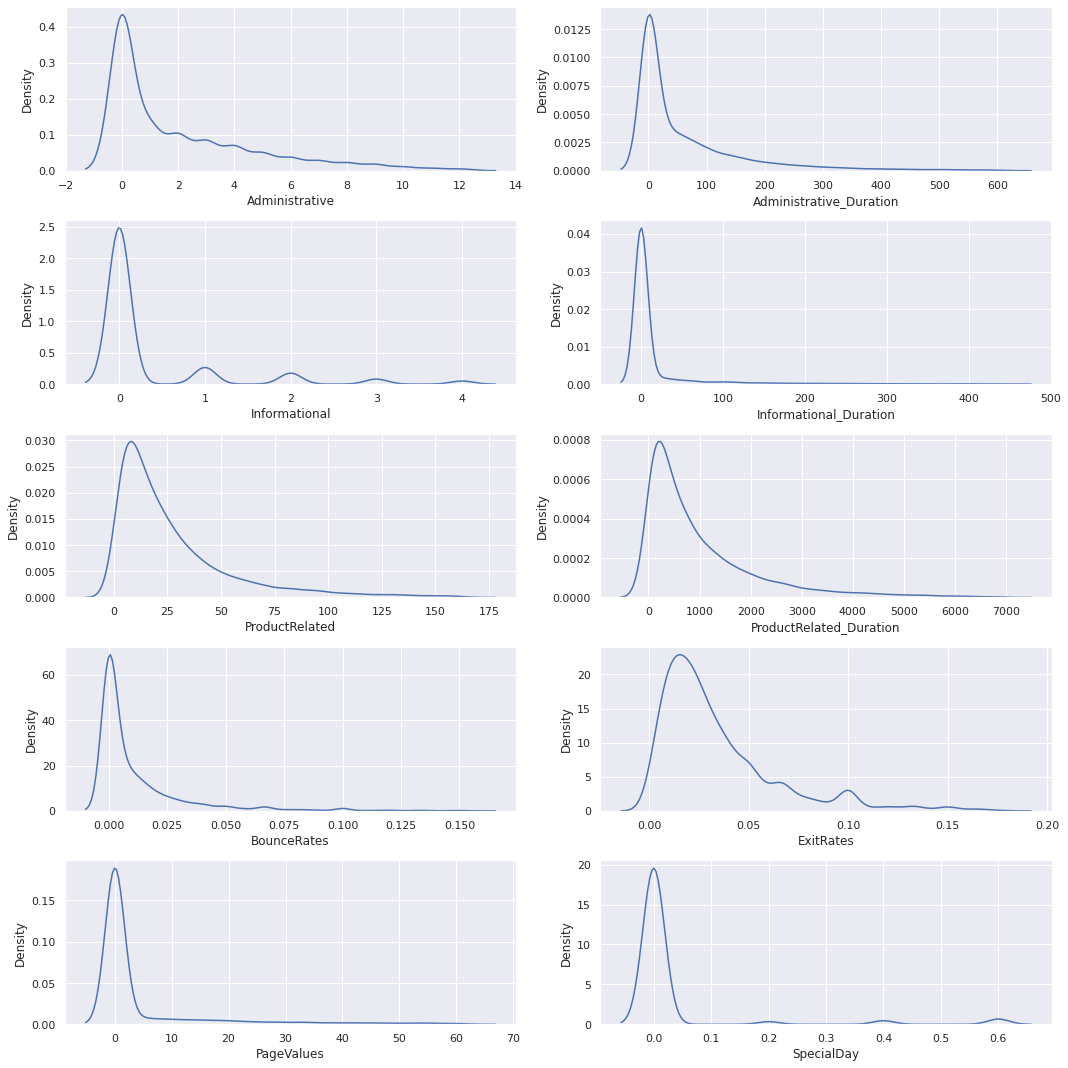

In [ ]:
plt.figure(figsize=(15, 15))
for i in range(0, len(nums)):
    plt.subplot(5, len(nums)/4, i+1)
    sns.kdeplot(x=df[nums[i]])
    plt.xlabel(nums[i])
    plt.tight_layout()

In [ ]:
# # Melakukan Log Transform
# # Run sekali
# for i in range(0, len(nums)):
#     df[nums[i]] = np.log(df[nums[i]] + 1)

In [ ]:
# Standarisasi
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer

for i in range(0, len(nums)):
    df[nums[i]] = StandardScaler().fit_transform(df[nums[i]].values.reshape(len(df[nums[i]]), 1))

In [ ]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,1.002000e+04,1.002000e+04,1.002000e+04,1.002000e+04,1.002000e+04,1.002000e+04,1.002000e+04,1.002000e+04,1.002000e+04,1.002000e+04,10020.000000,10020.000000,10020.000000,10020.000000
mean,2.833351e-15,1.785442e-15,-5.108699e-15,1.607718e-17,1.316205e-14,-2.682928e-16,-1.533748e-15,3.721352e-16,-4.583504e-15,2.139891e-14,2.113772,2.350798,3.151697,4.014471
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,0.886305,1.687538,2.402327,3.933128
min,-7.542489e-01,-6.120547e-01,-4.122813e-01,-2.912595e-01,-9.739346e-01,-8.781040e-01,-5.392258e-01,-1.142872e+00,-3.755336e-01,-2.540230e-01,1.000000,1.000000,1.000000,1.000000
25%,-7.542489e-01,-6.120547e-01,-4.122813e-01,-2.912595e-01,-6.852792e-01,-6.886995e-01,-5.392258e-01,-6.742085e-01,-3.755336e-01,-2.540230e-01,2.000000,2.000000,1.000000,2.000000
50%,-3.857485e-01,-5.213626e-01,-4.122813e-01,-2.912595e-01,-3.244600e-01,-3.560929e-01,-5.229482e-01,-3.042589e-01,-3.755336e-01,-2.540230e-01,2.000000,2.000000,3.000000,2.000000
75%,3.512522e-01,2.394433e-01,-4.122813e-01,-2.912595e-01,2.889326e-01,3.100463e-01,1.177119e-01,3.314862e-01,-3.755336e-01,-2.540230e-01,3.000000,2.000000,4.000000,4.000000
max,3.667755e+00,5.545267e+00,4.425023e+00,8.487643e+00,4.979582e+00,5.265292e+00,6.879652e+00,4.820599e+00,5.337123e+00,4.749865e+00,8.000000,13.000000,9.000000,20.000000


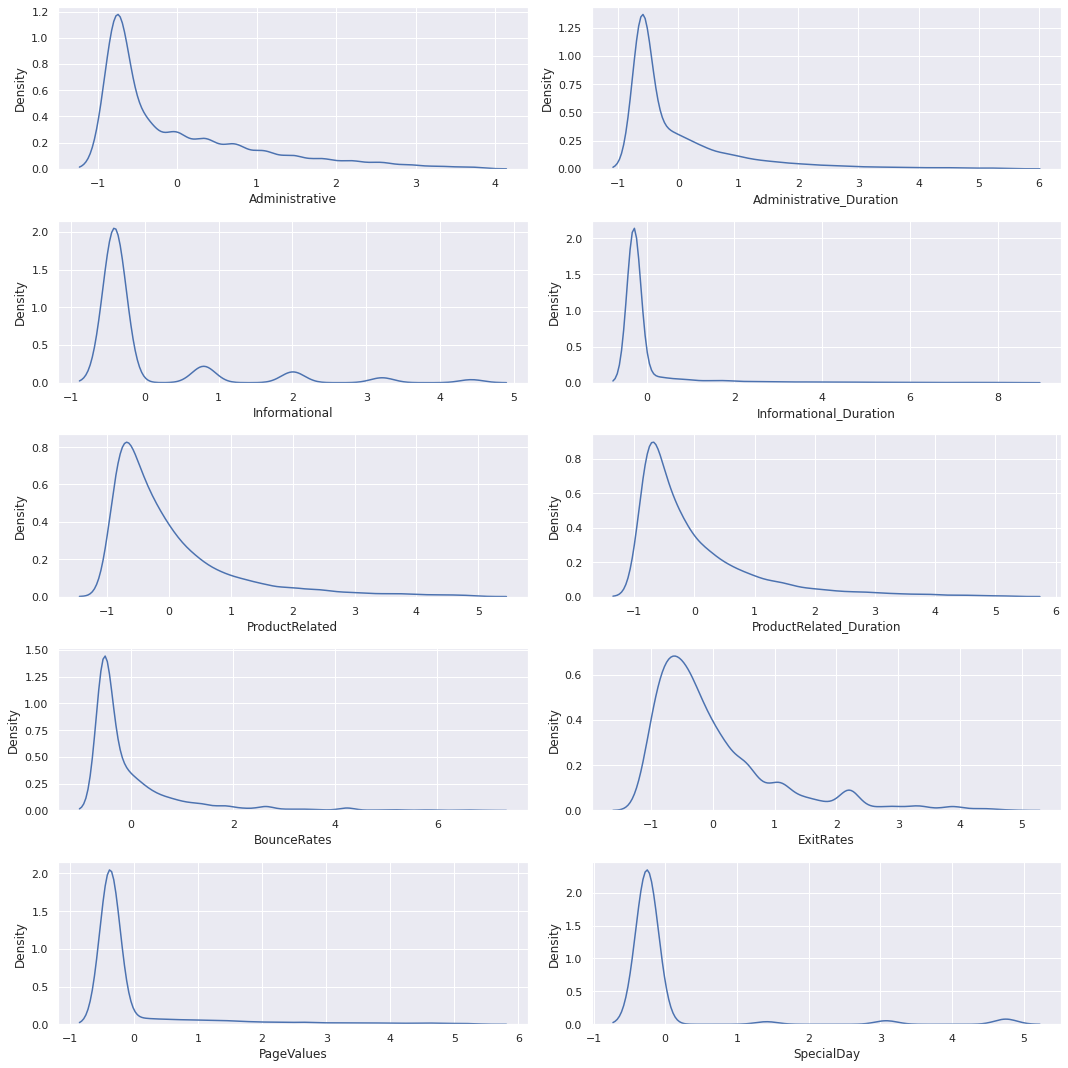

In [ ]:
# distribusi setelah log transform
plt.figure(figsize=(15, 15))
for i in range(0, len(nums)):
    plt.subplot(5, len(nums)/4, i+1)
    sns.kdeplot(x=df[nums[i]])
    plt.xlabel(nums[i])
    plt.tight_layout()

Terlihat distribusi fitur numerik setelah standarisasi, kurang mendekati normal. Kedepannya akan dicoba menggunakan teknik transformasi lain yang lebih handal.

### Feature Encoding

Untuk mengubah fitur kategorikal 'weekend' dan 'revenue' menjadi numerik, dilakukan Label Encoding.

In [ ]:
# Label Encoding
weekend_mapping = {
    False: 0,
    True: 1
}

revenue_mapping = {
    False: 0,
    True: 1
}

In [ ]:
df['Weekend'] = df['Weekend'].map(weekend_mapping)
df['Revenue'] = df['Revenue'].map(revenue_mapping)

Untuk mengubah fitur 'Month' dan 'VisitorType' dilakukan One Hot Encoding.

In [ ]:
# OHE
df = pd.get_dummies(data=df, 
                    columns=['Month', 'VisitorType'], 
                    drop_first=True)

In [ ]:
df.shape

(10020, 27)

In [ ]:
df.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
4787,0.351252,-0.219056,-0.412281,-0.29126,-0.757443,0.165093,-0.539226,-0.397438,-0.375534,-0.254023,...,0,0,0,0,1,0,0,0,0,1
9924,-0.754249,-0.612055,-0.412281,-0.29126,0.180687,-0.178294,0.056934,-0.286788,-0.375534,-0.254023,...,0,0,0,0,0,1,0,0,0,1
10865,-0.754249,-0.612055,0.797045,-0.29126,-0.757443,-0.432282,-0.539226,0.773958,-0.375534,-0.254023,...,0,0,0,0,0,1,0,0,0,1
8384,-0.754249,-0.612055,-0.412281,-0.29126,-0.865689,-0.837454,-0.539226,-0.024721,-0.375534,-0.254023,...,0,0,0,0,0,0,0,0,0,1
6692,-0.385749,-0.561670,-0.412281,-0.29126,-0.757443,-0.772415,-0.539226,-0.663665,-0.375534,-0.254023,...,0,1,0,0,0,0,0,0,0,0


Terlihat pada data sample, semua fitur telah diubah menjadi numerik. Hal ini dilakukan. harapannya dapat meningkatkan performance dari model Machine Learning.

### Imbalanced Dataset

In [ ]:
df['Revenue'].value_counts()

0    8571
1    1449
Name: Revenue, dtype: int64

In [ ]:
# Imbalanced
X = df[[col for col in df.columns if(str(df[col].dtype) != 'object') and col not in ['Revenue']]]
y = df['Revenue'].values

print(X.shape)
print(y.shape)

(10020, 26)
(10020,)


In [ ]:
from imblearn import under_sampling, over_sampling
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(0.5).fit_resample(X, y)

In [ ]:
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

SMOTE
0    8571
1    4285
dtype: int64


### Feature Engineering

In [ ]:
df2 = df.drop(['OperatingSystems','Browser','Region','TrafficType','Weekend'], axis=1)

Feature selection (membuang feature yang kurang relevan atau redundan) = Berdasarkan insight yang didapat saat melakukan EDA (bagian korelasi dan heatmap), maka diputuskan untuk membuang 5 fitur yang mempunyai korelasi  sangat rendah (~0) dengan target (Revenue), yaitu OperatingSystems, Browser, Region, TrafficType, Weekend. Kemudian karena korelasi antara bounce dan exit rate sangat kuat (0.91), maka diambil salah satu saja. Dan juga ProductRelated memiliki korelasi positif sangat kuat dengan ProductRelated_Duration, kemungkinan kedua feature ini redundan (dipilih salah satunya saja untuk training data)